# Setup

In [7]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"

In [8]:
# Add directory above current directory to path
import sys

sys.path.insert(0, '..')

In [9]:
import json
from utils.metrics import extract_metrics_config, Metric

In [10]:
config_1 = json.load(open("./experiments/configs/mnn_em.json"))
config_2 = json.load(open("./experiments/configs/mnn_em_random_deletion.json"))
config_3 = json.load(open("./experiments/configs/ext_mnn_em.json"))
config_4 = json.load(open("./experiments/configs/ext_mnn_em_random_deletion.json"))

In [11]:
# add prefix to path

config_1["model"]["training"][
    "log_dir"] = "experiments/" + config_1["model"]["training"]["log_dir"]
config_2["model"]["training"][
    "log_dir"] = "experiments/" + config_2["model"]["training"]["log_dir"]
config_3["model"]["training"][
    "log_dir"] = "experiments/" + config_3["model"]["training"]["log_dir"]
config_4["model"]["training"][
    "log_dir"] = "experiments/" + config_4["model"]["training"]["log_dir"]

# Load metrics

In [12]:
metrics_1 = Metric(**extract_metrics_config(config_1))
metrics_2 = Metric(**extract_metrics_config(config_2))
metrics_3 = Metric(**extract_metrics_config(config_3))
metrics_4 = Metric(**extract_metrics_config(config_4))

# ROC Curve

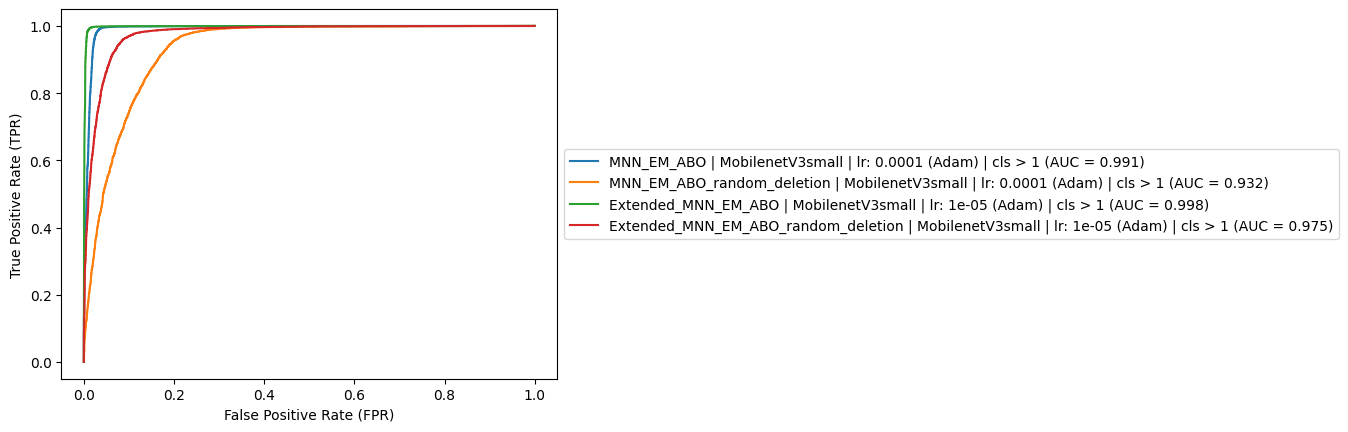

In [13]:
metrics_1.plot_roc()
metrics_2.plot_roc()
metrics_3.plot_roc()
metrics_4.plot_roc()

# Precision-Recall Curve (PRC)

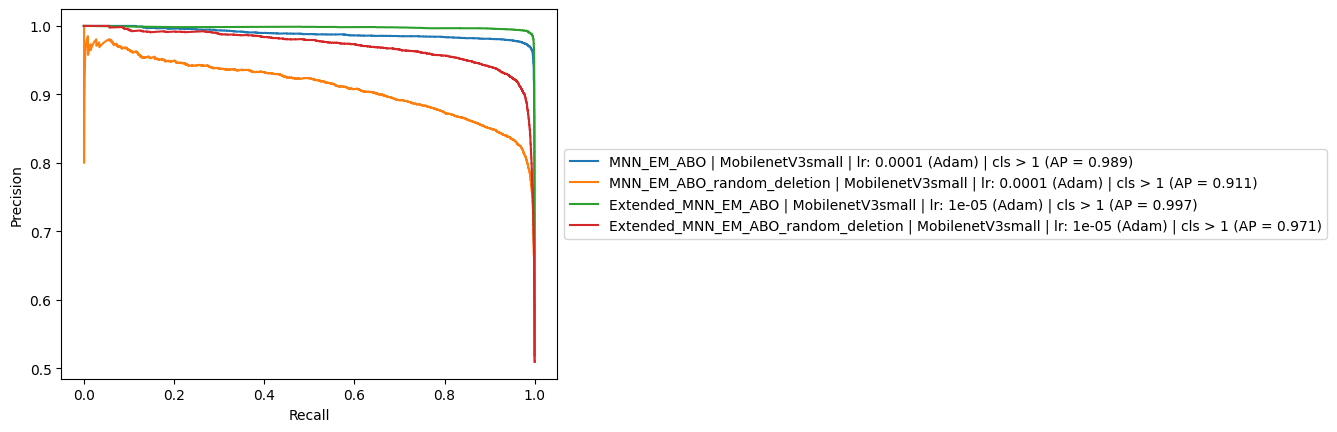

In [14]:
metrics_1.plot_prc()
metrics_2.plot_prc()
metrics_3.plot_prc()
metrics_4.plot_prc()

# Optimal accuracy

The `optimize_threshold()` method calculates and outputs optimal threshold for ROC curve using G-Mean and Youden-Index/J, as well as the optimal threshold for Precision-Recall curve using F-Score.

See also https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

In [15]:
import pandas as pd

In [16]:
metrics_df = pd.DataFrame.from_dict(
    [metrics_1.optimize_threshold(),
     metrics_2.optimize_threshold(),
     metrics_3.optimize_threshold(),
     metrics_4.optimize_threshold()])
metrics_df

2023-06-02 09:55:09.406918: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 09:55:10.164940: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-06-02 09:55:10.164998: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11856 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0001:00:00.0, compute capability: 7.0


,Model name,Image CNN,Optimizer,lr,cls,AUC-ROC,AUC-PRC,G-Mean,Threshold G-Mean,Accuracy G-Mean,J,Threshold J,Accuracy J,Precision,Recall,F-Score,Threshold F-Score,Accuracy F-Score
0,MNN_EM_ABO,MobilenetV3small,Adam,0.00010,1,0.991360,0.988667,0.978022,0.293328,0.978474,0.956186,0.293328,0.978474,0.969139,0.990140,0.979527,0.274656,0.978474
1,MNN_EM_ABO_random_deletion,MobilenetV3small,Adam,0.00010,1,0.931960,0.911286,0.874926,0.427140,0.879531,0.756354,0.427140,0.879531,0.824731,0.968516,0.890859,0.281702,0.879036
2,Extended_MNN_EM_ABO,MobilenetV3small,Adam,0.00001,1,0.997729,0.997415,0.990199,0.876642,0.990248,0.980406,0.876642,0.990248,0.988249,0.993121,0.990679,0.870976,0.990248
3,Extended_MNN_EM_ABO_random_deletion,MobilenetV3small,Adam,0.00001,1,0.975119,0.970694,0.936174,0.649181,0.936833,0.872928,0.649181,0.936833,0.916953,0.963245,0.939529,0.614683,0.936763
